In [30]:
from scipy.io import arff
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data

The dataset is available both from the OpenML and the UCI archieve.
OpenML provides an arff file and UCI csv files

In [17]:
# Load the arff file from OpenML
data_arff = arff.loadarff('../data/bank_marketing/phpkIxskf.arff')

# Load the csv fies from UCI
data_bank_full = pd.read_csv('../data/bank_marketing/bank-additional-full.csv', sep=';')
#data_bank = pd.read_csv('../data/bank.csv', sep=';')

In [18]:
df_arff = pd.DataFrame(data_arff[0])
df_arff.head()
data_arff[1]

Dataset: bank-marketing-full
	V1's type is numeric
	V2's type is nominal, range is ('admin.', 'blue-collar', 'entrepreneur', 'housemaid', 'management', 'retired', 'self-employed', 'services', 'student', 'technician', 'unemployed', 'unknown')
	V3's type is nominal, range is ('divorced', 'married', 'single')
	V4's type is nominal, range is ('primary', 'secondary', 'tertiary', 'unknown')
	V5's type is nominal, range is ('no', 'yes')
	V6's type is numeric
	V7's type is nominal, range is ('no', 'yes')
	V8's type is nominal, range is ('no', 'yes')
	V9's type is nominal, range is ('cellular', 'telephone', 'unknown')
	V10's type is numeric
	V11's type is nominal, range is ('apr', 'aug', 'dec', 'feb', 'jan', 'jul', 'jun', 'mar', 'may', 'nov', 'oct', 'sep')
	V12's type is numeric
	V13's type is numeric
	V14's type is numeric
	V15's type is numeric
	V16's type is nominal, range is ('failure', 'other', 'success', 'unknown')
	Class's type is nominal, range is ('1', '2')

In [19]:
data_bank_full.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [20]:
data_bank_full.shape

(41188, 21)

Based on the better format and the more in depth description of the data, we decided to use the dataset from UCI, found on the following link: https://archive.ics.uci.edu/dataset/222/bank+marketing

# Analysis of the data

In [21]:
# First check if there are NaN values in the data frame
data_bank_full.isna().sum()

# based on the description of the data, for unknown values the string "unknown" is written 
data_bank_full.apply(pd.Series.value_counts).loc['unknown']

age                  NaN
job                330.0
marital             80.0
education         1731.0
default           8597.0
housing            990.0
loan               990.0
contact              NaN
month                NaN
day_of_week          NaN
duration             NaN
campaign             NaN
pdays                NaN
previous             NaN
poutcome             NaN
emp.var.rate         NaN
cons.price.idx       NaN
cons.conf.idx        NaN
euribor3m            NaN
nr.employed          NaN
y                    NaN
Name: unknown, dtype: float64

In [22]:
data_bank_full.dtypes
#data_bank_full.describe()

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

In [23]:
# get the numeric columns
numeric_columns = data_bank_full.select_dtypes(include=np.number).columns.tolist()

# check the range in the numeric columns
range_values = data_bank_full.describe().loc[['min', 'max']].transpose()

# Apply the formatting
range_values['Formatted Range'] = range_values.apply(lambda row: f"[{row['min']}, {row['max']}]", axis=1)

# Display the formatted range values
print("Range of Values for All Attributes:")
print(range_values[['Formatted Range']])

Range of Values for All Attributes:
                 Formatted Range
age                 [17.0, 98.0]
duration           [0.0, 4918.0]
campaign             [1.0, 56.0]
pdays               [0.0, 999.0]
previous              [0.0, 7.0]
emp.var.rate         [-3.4, 1.4]
cons.price.idx  [92.201, 94.767]
cons.conf.idx     [-50.8, -26.9]
euribor3m         [0.634, 5.045]
nr.employed     [4963.6, 5228.1]


In [24]:
# get the categorical/string columns
categorical_columns = data_bank_full.select_dtypes(include=object).columns.tolist()

# get the categorical values for each categorical column
categories = data_bank_full[categorical_columns].apply(lambda column: column.unique())
print(categories)
# Print the occurance of the categorical values
categorical_counts = {}
for column in categorical_columns:
    value_counts = data_bank_full[column].value_counts()
    categorical_counts[column] = value_counts

for column, counts in categorical_counts.items():
    print(f"Column '{column}':")
    print(counts)
    print()

job            [housemaid, services, admin., blue-collar, tec...
marital                     [married, single, divorced, unknown]
education      [basic.4y, high.school, basic.6y, basic.9y, pr...
default                                       [no, unknown, yes]
housing                                       [no, yes, unknown]
loan                                          [no, yes, unknown]
contact                                    [telephone, cellular]
month          [may, jun, jul, aug, oct, nov, dec, mar, apr, ...
day_of_week                            [mon, tue, wed, thu, fri]
poutcome                         [nonexistent, failure, success]
y                                                      [no, yes]
dtype: object
Column 'job':
admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unkn

In [25]:
# get the number of unknown values for each categorical column
data_bank_full[categorical_columns].apply(pd.Series.value_counts).loc['unknown']

job             330.0
marital          80.0
education      1731.0
default        8597.0
housing         990.0
loan            990.0
contact           NaN
month             NaN
day_of_week       NaN
poutcome          NaN
y                 NaN
Name: unknown, dtype: float64

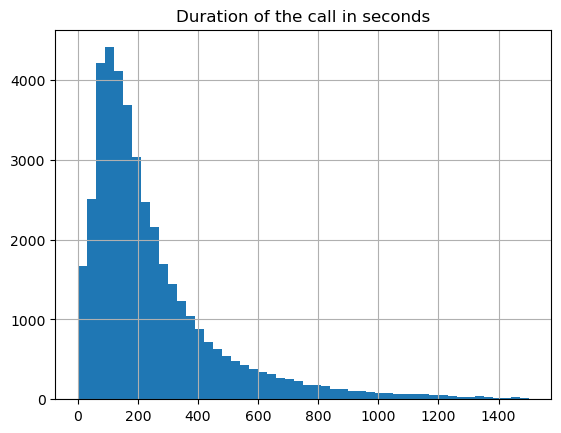

In [36]:
plt.hist(data_bank_full['duration'], bins=50, range=(0, 1500))
plt.title("Duration of the call in seconds")
plt.grid(True)